# Apply Segmenter on Testing Data

In [1]:
import apoc
import os
from skimage.io import imread, imsave, imshow
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
import numpy 
import napari

In [2]:
image_folder = "/Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/1. normalized images/"

In [3]:
file_list = sorted(os.listdir(image_folder))
file_list

['img04_20220429_ET358_56hpf_4.tif',
 'img07_20220513_ET358_56hpf_3.tif',
 'img09_20220513_ET358_56hpf_5.tif',
 'img11_20220513_ET358_56hpf_7.tif',
 'img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif']

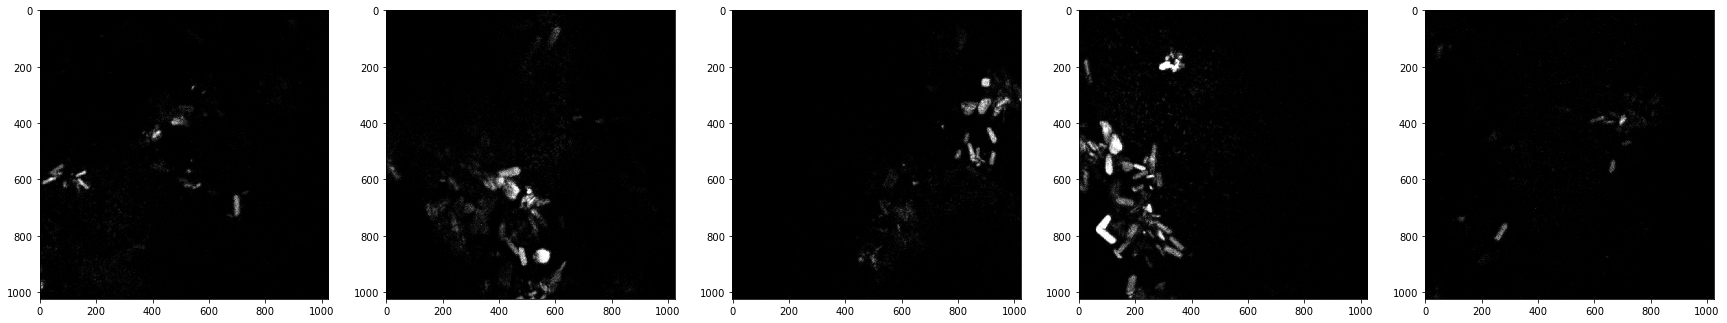

In [4]:
# show all images
fig, axs = plt.subplots(1, 5, figsize=(30,30))
for i, filename in enumerate(file_list):
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[i])
plt.show()

In [5]:
segmenter = apoc.ObjectSegmenter(opencl_filename = "/Users/mara/Desktop/Bachelorarbeit/Robert - PoL/beautiful notebooks <3/3.2 Approach 2 (easier)_ First excluding small labels _ then Table/object_segmenter_20220523_my_data_sorted.cl")

In [6]:
results_of_object_segmenter_in_range = "/Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/3. in range result of object segmenter/"

In [7]:
os.makedirs(results_of_object_segmenter_in_range, exist_ok=True)

img04_20220429_ET358_56hpf_4.tif


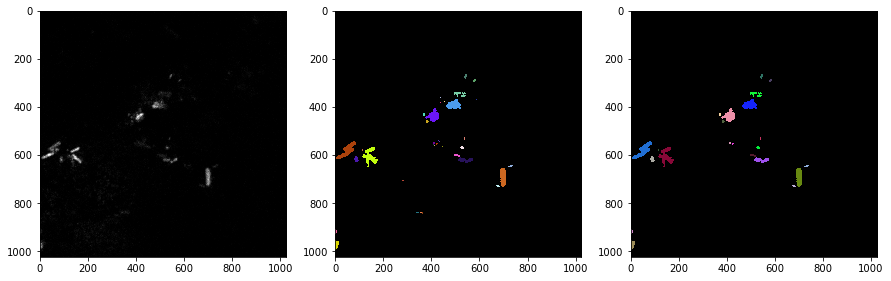

/var/folders/ss/9k23w8zd78n4h7c7p0271ljc0000gn/T/ipykernel_24788/1180423934.py:21: UserWarning: /Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/3. in range result of object segmenter/img04_20220429_ET358_56hpf_4.tif is a low contrast image
  imsave(results_of_object_segmenter_in_range + filename, labels_in_range)


img07_20220513_ET358_56hpf_3.tif


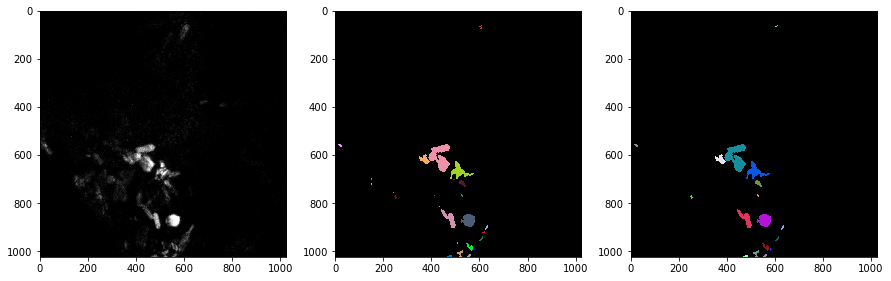

/var/folders/ss/9k23w8zd78n4h7c7p0271ljc0000gn/T/ipykernel_24788/1180423934.py:21: UserWarning: /Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/3. in range result of object segmenter/img07_20220513_ET358_56hpf_3.tif is a low contrast image
  imsave(results_of_object_segmenter_in_range + filename, labels_in_range)


img09_20220513_ET358_56hpf_5.tif


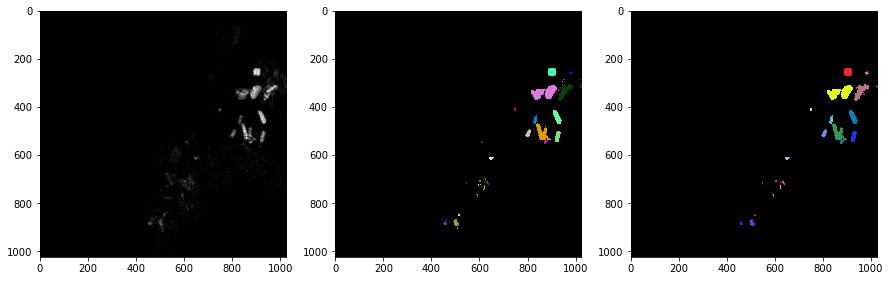

/var/folders/ss/9k23w8zd78n4h7c7p0271ljc0000gn/T/ipykernel_24788/1180423934.py:21: UserWarning: /Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/3. in range result of object segmenter/img09_20220513_ET358_56hpf_5.tif is a low contrast image
  imsave(results_of_object_segmenter_in_range + filename, labels_in_range)


img11_20220513_ET358_56hpf_7.tif


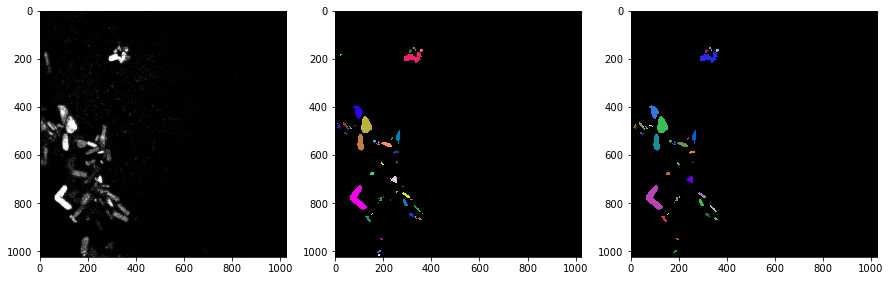

/var/folders/ss/9k23w8zd78n4h7c7p0271ljc0000gn/T/ipykernel_24788/1180423934.py:21: UserWarning: /Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/3. in range result of object segmenter/img11_20220513_ET358_56hpf_7.tif is a low contrast image
  imsave(results_of_object_segmenter_in_range + filename, labels_in_range)


img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif


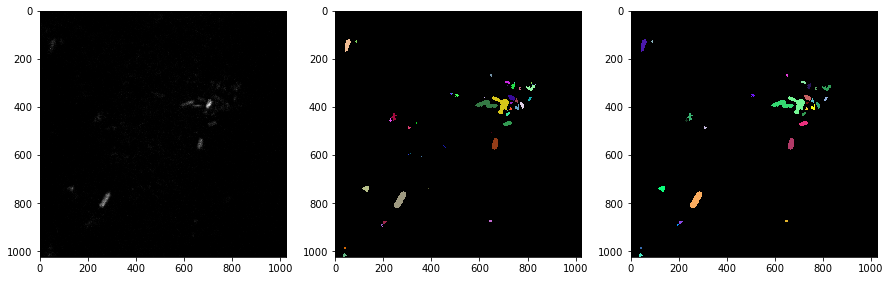

/var/folders/ss/9k23w8zd78n4h7c7p0271ljc0000gn/T/ipykernel_24788/1180423934.py:21: UserWarning: /Users/mara/Desktop/Bachelorarbeit/Robert - PoL/20220523_training data/no training data/3. in range result of object segmenter/img16_20220520_hsp-mKate-DN-dynactin_56hpf_3.tif is a low contrast image
  imsave(results_of_object_segmenter_in_range + filename, labels_in_range)


In [8]:
# show all images
for i, filename in enumerate(file_list):
    fig, axs = plt.subplots(1, 3, figsize=(15,15))
    
    #show original
    print(filename)
    image = imread(image_folder + filename)
    cle.imshow(image, plot=axs[0])
    
     #show result of object segmenter
    labels = segmenter.predict(image)
    cle.imshow(labels, plot=axs[1], labels=True)
    
    #show result of object segmenter with labels in range
    labels_in_range = cle.exclude_labels_out_of_size_range(source = labels, minimum_size = 50, maximum_size=5000000000000)
    cle.imshow(labels_in_range, plot=axs[2], labels = True)
    
    plt.show()# show all images
    
    #save result of object segmenter with labels in range
    imsave(results_of_object_segmenter_in_range + filename, labels_in_range)